In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_footsteps_accelerations_absolute
%store -r Y_footsteps_accelerations_absolute
%store -r X_footsteps_continuous_absolute
%store -r Y_footsteps_continuous_absolute
X_motion = np.concatenate((X_footsteps_accelerations_absolute, X_footsteps_continuous_absolute))
Y_motion = np.concatenate((Y_footsteps_accelerations_absolute, Y_footsteps_continuous_absolute))
print(X_motion.shape)
print(Y_motion.shape)

(1697, 35)
(1697, 4)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

In [7]:
## Entries where FL is swinging
idxs = np.where(X_motion[:, -2] == 1)[0]
X_motion_FL_swinging = X_motion[idxs]
Y_motion_FL_swinging = Y_motion[idxs]

## Predict FL foot -> x

In [8]:
X_motion_FL_swinging.shape

(847, 35)

In [9]:
Y_motion_FL_swinging.shape

(847, 4)

In [10]:
X_motion_FL_swinging[0:10, 0]

array([0.1, 0.1, 0.2, 0.1, 0.1, 0.2, 0.2, 0.1, 0.1, 0.2])

### Linear Regression

In [11]:
# Input
X = np.hstack((X_motion_FL_swinging[:, :3], # Previous motion command
               X_motion_FL_swinging[:, -5:-2], # Current motion command
               X_motion_FL_swinging[:, 3:5], # FL (x,y) position
               X_motion_FL_swinging[:, 6:8], # FR (x,y) position
               X_motion_FL_swinging[:, 9:11], # RL (x,y) position
               X_motion_FL_swinging[:, 12:14])) # RR (x, y) position

# Target
Y = np.array([Y_motion_FL_swinging[:, 0]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_fl_relative_support_x = LinearRegression()

# Fit the model
model_fl_relative_support_x.fit(X_train, Y_train)
    
# Predict
predictions = model_fl_relative_support_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9919959021101079
RMSE:  0.008371882956722096
The lowest error is:  1.8139232705938202e-05
The highest error is:  0.02924176851338442
The avg. error is:  0.006296177279457999


In [12]:
model_fl_relative_support_x.coef_

array([[-1.65212809e-02, -4.44089210e-16, -5.55111512e-17,
         3.05471858e-01, -1.66533454e-16, -1.38777878e-16,
        -1.82220424e+00, -3.72930764e-01,  6.34679512e-02,
        -7.21308518e-01,  7.22890998e-01,  5.01791567e-01,
         7.69727237e-01,  5.56016887e-01]])

In [13]:
model_fl_relative_support_x.intercept_

array([0.79274179])

Text(0, 0.5, 'Predictions')

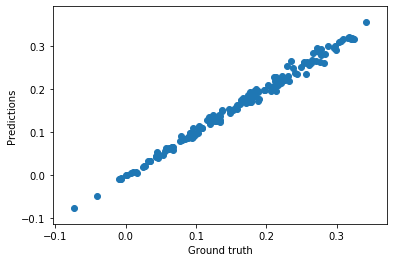

In [14]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [15]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

### Predict FL foot -> y

In [16]:
# Input
X = np.hstack((X_motion_FL_swinging[:, :3], # Previous motion command
               X_motion_FL_swinging[:, -5:-2], # Current motion command
               X_motion_FL_swinging[:, 3:5], # FL (x,y) position
               X_motion_FL_swinging[:, 6:8], # FR (x,y) position
               X_motion_FL_swinging[:, 9:11], # RL (x,y) position
               X_motion_FL_swinging[:, 12:14])) # RR (x, y) position

# Target
Y = np.array([Y_motion_FL_swinging[:, 1]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_fl_relative_support_y = LinearRegression()

# Fit the model
model_fl_relative_support_y.fit(X_train, Y_train)

# Predict
predictions = model_fl_relative_support_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.854479366829218
RMSE:  0.006252058706826145
The lowest error is:  3.209322169628326e-06
The highest error is:  0.0194990085850891
The avg. error is:  0.004893541657555431


In [17]:
model_fl_relative_support_y.coef_

array([[ 6.28315932e-02,  7.28583860e-16,  3.88578059e-16,
        -6.72277297e-02,  9.43689571e-16, -3.46944695e-16,
         5.05572846e-01, -5.06277613e-01, -1.38884434e+00,
        -9.34526724e-02,  1.19384983e+00,  1.03736099e+00,
        -4.16524238e-01, -8.76821954e-01]])

In [18]:
model_fl_relative_support_y.intercept_

array([0.24082866])

Text(0, 0.5, 'Predictions')

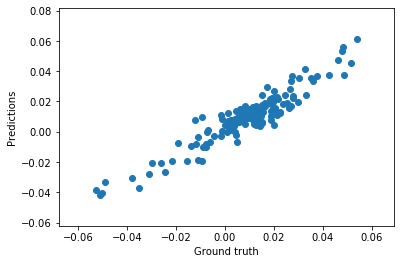

In [19]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [20]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')